# Decagon Marketing Tools

## Introduction

The code I wrote contains marketing analytics tools for:

* calculating customer lifetime value
* data-driven market segmentation
* product recommendations
* customer location visualization
* developing successful marketing strategies

Examples of each will be shown below.

In [1]:
# import statements
import tools as t
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Recommender System

One way to recommend products to customers is to look at what other similar customers bought. In this case, we define similarity to be the cosine similarity of two feature vectors. Using sales data containing customers and the products they have purchased, we can generate recommendations for customers based on their previous purchases as compared to other similar customers.

In [2]:
# dictionary converts customer id to customer name
to_name = t.make_to_name()

R = t.recommender('../data/PTTPARTS.csv')
R.similarity_matrix(transpose=True)

start time
Tue Aug 23 10:59:46 2016
computing...
0.0
finished in 0 seconds


In [3]:
print(to_name['1057']+' is similar to...\n')
for i in R.similar_to(1057)[:15]:
    name = to_name[R.from_index[i[0]]]
    if t.use(name):
        print(name,i[1])

Oregon Freeze Dry Foods is similar to...

('Aveda Corporation', 0.38346821065500492)
('Colgate Palmolive Tech Center', 0.36245699167329504)
('Novo Nordisk', 0.32069443135208864)
('Allied Old English, Inc.', 0.24309684249639285)
('North Carolina State Universit', 0.23108408032649064)
('Carolina Foods Inc', 0.21473892259683336)
('Quali Tech Inc', 0.21118547093938189)
('Labomar d.o.o.', 0.19427937057310141)
('The Jerky Shoppe', 0.18108065446288402)
('G & G Enterprises Inc', 0.17402004840930574)
('Bimbo Bakeries USA', 0.17393181644453315)
('Lightlife Foods', 0.16918824204598992)


In [4]:
print R.recommend(1057)[:,0]

['Pawkit' 'AquaLab Lite' 'AquaLab S4TEV' 'AquaLab Trade-In' 'AquaLab Pre'
 'Pawkit 2' 'AquaLab S3' 'AquaLab 4 Dew' 'AquaLink' 'Refurbished AquaLab']


## Marketing Strategy

Trying to sell a new product to old customers can be thought of as a Multi-Armed Bandit problem. We can solve our dilemma using Thompson Sampling. Each curve below represents what we think the payout probability of a bandit is. The height represents how strong we believe that this is the actual average of the bandit payout.

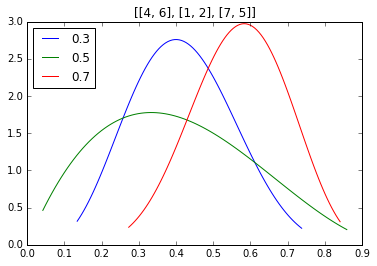

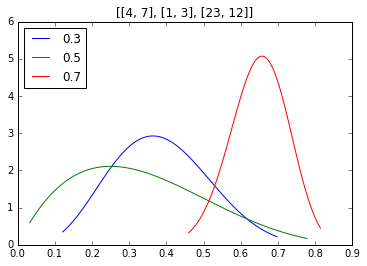

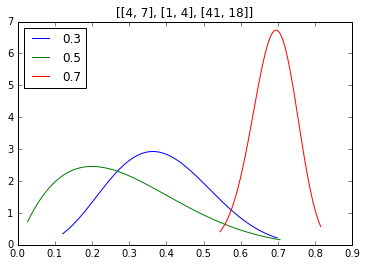

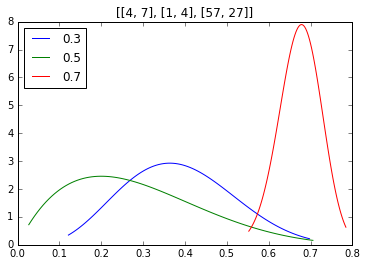

In [15]:
t.testMAB(3,[.3,.5,.7],[.3,.5,.7],niters=100)

## Market Segmentation

One method of customer segmentation relies on feature vectors and graph theory models (otherwise known as networks). We can construct a representation of a graph (network) by using the similarity matrix already computed in the recommender object. Then we can use Markov Clustering to find the groups that are most connected.

Suppose that someone opens up a bar in town called the Biz-R Bar and it has 16 regular customers. The drinks offered at the Biz-R Bar are (in alphabetical order) beer, energy drinks, juice, lemonade, milk, soda, water, and wine. For each visit, the bartender collected data on which drinks each customer ordered and put them in the file `data/example.csv`. The bartender would like to know if there are certain types of people who order certain things, or if it's all just random.

In [6]:
R = t.recommender('../data/example.csv')
R.similarity_matrix()

start time
Tue Aug 23 10:59:48 2016
computing...
0.0
finished in 0 seconds


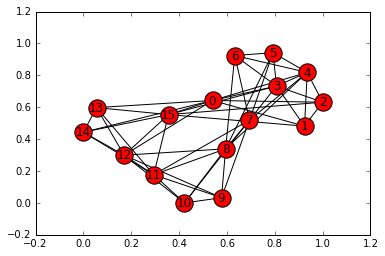

In [7]:
G2 = t.nx.Graph(R.D)
t.nx.draw_networkx(G2)

In [8]:
cust_clusters = t.markov_cluster_algorithm(R.D,2,2)

0
25
50
75


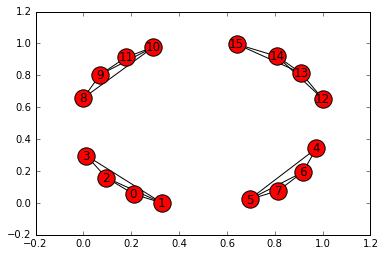

In [9]:
G = t.nx.Graph(cust_clusters)
t.nx.draw_networkx(G)

Note that we were able to find 4 different groups or clusters of people despite the complexity of what appeared to be a very interconnected network.

## Customer Lifetime Value

We want to know who our most valuable customers are so that we can spend our limited resources on the customers who are most worth the investment. The clv object pulls data from the sales database and predicts average purchase behavior of each customer over a specified time period using a statistical model detailed in *"Counting Your Customers" the Easy Way: An Alternative to the Pareto/NBD Model* by Fader, et al. Much thanks to Brianne for guidance and direction.

In [10]:
C = t.CLV()
C.get_data_from_file('../data/pmg01.csv')
C.fit()

In [11]:
print(C.results[:5])

       frequency  recency     T  monetary_value  predicted_purchases  \
id                                                                     
36413       40.0     78.0  81.0    9.267299e+06            43.297793   
48379       13.0     22.0  24.0    9.234662e+03            39.999266   
4017        47.0     93.0  96.0    8.108095e+03            43.498003   
9946         2.0     32.0  44.0    6.468293e+04             4.656564   
4885        76.0     94.0  96.0    3.906934e+03            70.049703   

       predicted_trans_profit  clv_estimation  prob_alive  
id                                                         
36413            9.262273e+06    4.010360e+08    0.997020  
48379            9.223588e+03    3.689368e+05    0.994689  
4017             8.105548e+03    3.525752e+05    0.997455  
9946             6.401612e+04    2.980951e+05    0.978090  
4885             3.906559e+03    2.736533e+05    0.998260  


## Visualizing Customer Locations

Suppose we wanted to expand Decagon by relocating sales representatives to 10 key cities around the United States. We need to place them in such a way as to minimize the distance to nearby customers. This can be found out using k-means clustering on the gps coordinates, as shown below. The large grey dots represent general areas that we should consider placing our sales reps.

In [12]:
N = t.Nightmap()
# the clv represents the total clv of the continental United States

clv for area:
436226858.761


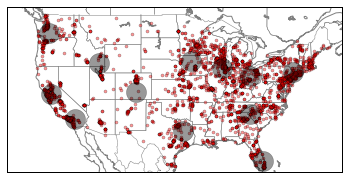

In [13]:
N.worldplot(kmeans=12)